# importing modules

In [4]:
import os
import pickle

import matplotlib.pyplot as plt

from src import utils

# loading models etc

In [5]:
base_path = "./data/outputs/models"
gps = os.listdir(base_path)

data = {}

for gp_ in gps:
    data[gp_] = {
        "models": [],
        "results": []
    }
    for file_ in os.listdir(os.path.join(base_path, gp_)):
        if file_.endswith(".pth"):
            data[gp_]["models"].append(file_)
        elif file_.endswith(".pickle"):
            with open(os.path.join(base_path, gp_, file_), "rb") as f:
                data[gp_]["results"].append(pickle.load(f))

num_gps = len(data.keys())
print(f"{num_gps} groups in total")
for gp_ in data.keys():
    print(f"\tGroup {gp_}:")
    num_models = len(data[gp_]["models"])
    num_results = len(data[gp_]["results"])
    print(f"\t\tModels found: {num_models}")
    print(f"\t\tResults found: {num_results}")

4 groups in total
	Group transformer_based:
		Models found: 3
		Results found: 3
	Group cnn_based:
		Models found: 2
		Results found: 2
	Group ligh_weight:
		Models found: 1
		Results found: 1
	Group ensemble:
		Models found: 0
		Results found: 0


# getting info out of the models

In [6]:
for gp_ in data.keys():
    data[gp_]["encoder_names"] = []
    for model_ in data[gp_]["models"]:
        data[gp_]["encoder_names"].append(utils.find_encoder_name(model_))

In [23]:
def plot_loss(results):
    num = len(results)
    fig, ax = plt.subplots(num, 1, figsize=(15, num * 8))
    for i in range(num):
        data = results[i]
        ax[i].plot(data["epoch"], data["train_loss"])
        ax[i].plot(data["epoch"], data["val_loss"])
        ax[i].grid(True)
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel('Loss')
        ax[i].legend(['Train', 'Val'], loc='upper right')
        ax[i].set_title(results["encoder_name"][i])
    return fig


def plot_accuracy(results):
    num = len(results)
    fig, ax = plt.subplots(num, 1, figsize=(15, num * 8))
    for i in range(num):
        data = results[i]
        ax[i].plot(data["epoch"], data["train_acc"])
        ax[i].plot(data["epoch"], data["val_acc"])
        ax[i].grid(True)
        ax[i].set_xlabel('Epoch')
        ax[i].set_ylabel('Accuracy')
        ax[i].legend(['Train', 'Val'], loc='upper right')
        ax[i].set_title(results["encoder_name"][i])
    return fig

In [27]:
data["cnn_based"].keys()

dict_keys(['models', 'results'])

TypeError: list indices must be integers or slices, not str

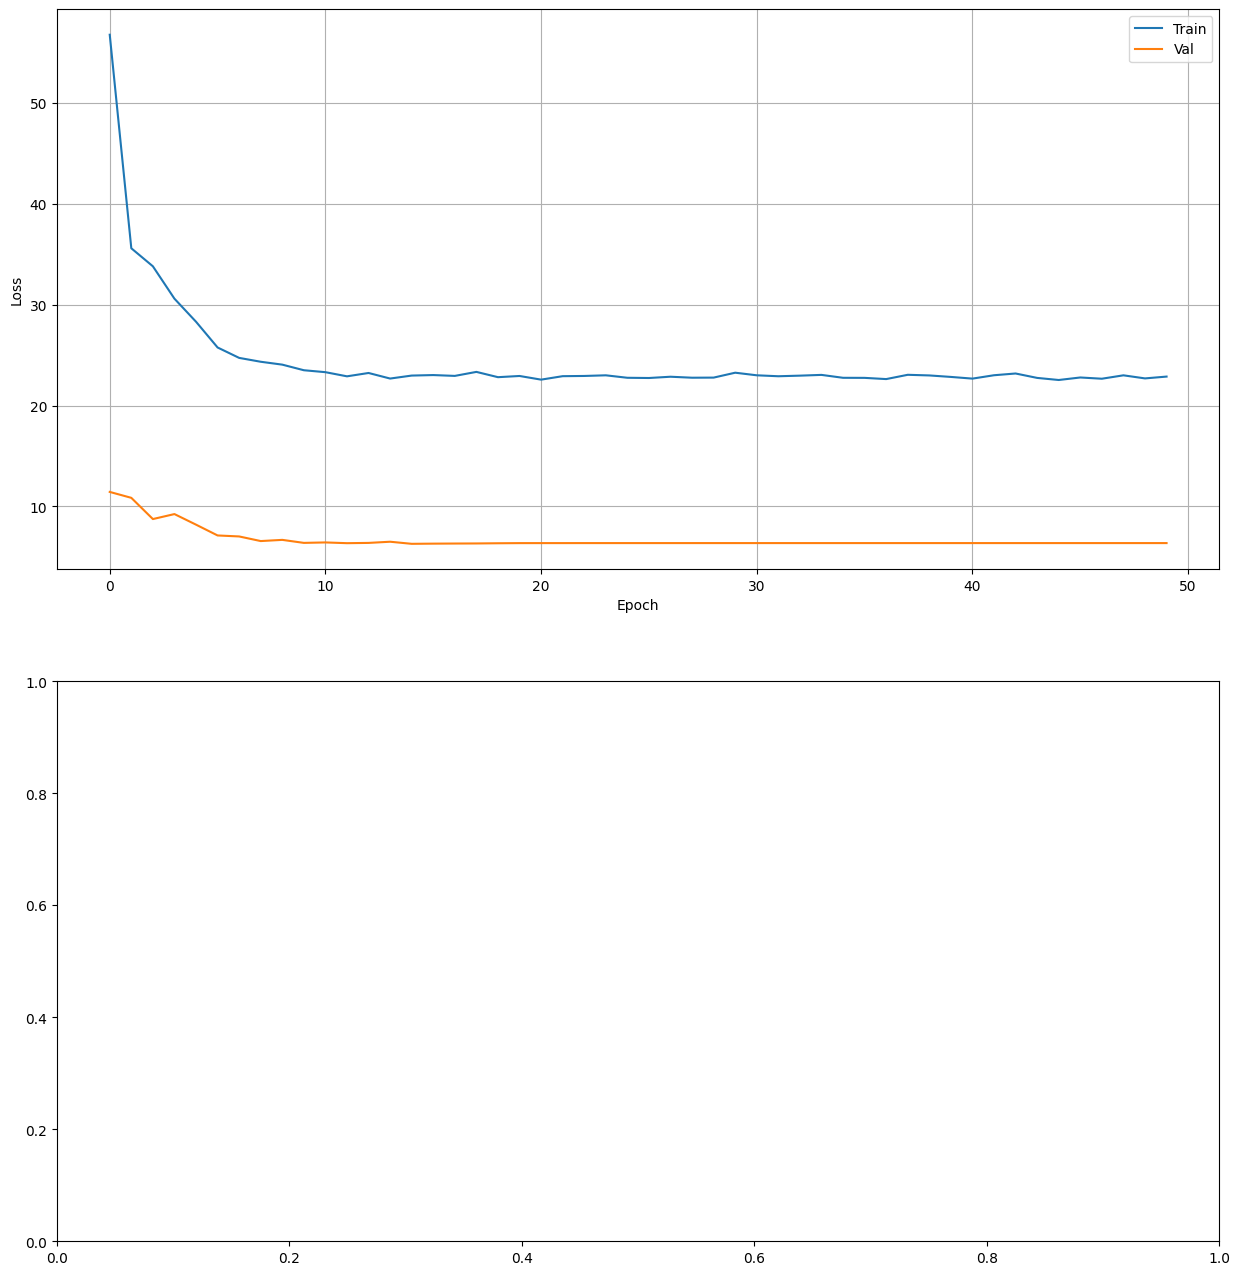

In [24]:
gp_name = "cnn_based"
plot_data = data[gp_name]["results"]
loss_fig = plot_loss(plot_data)

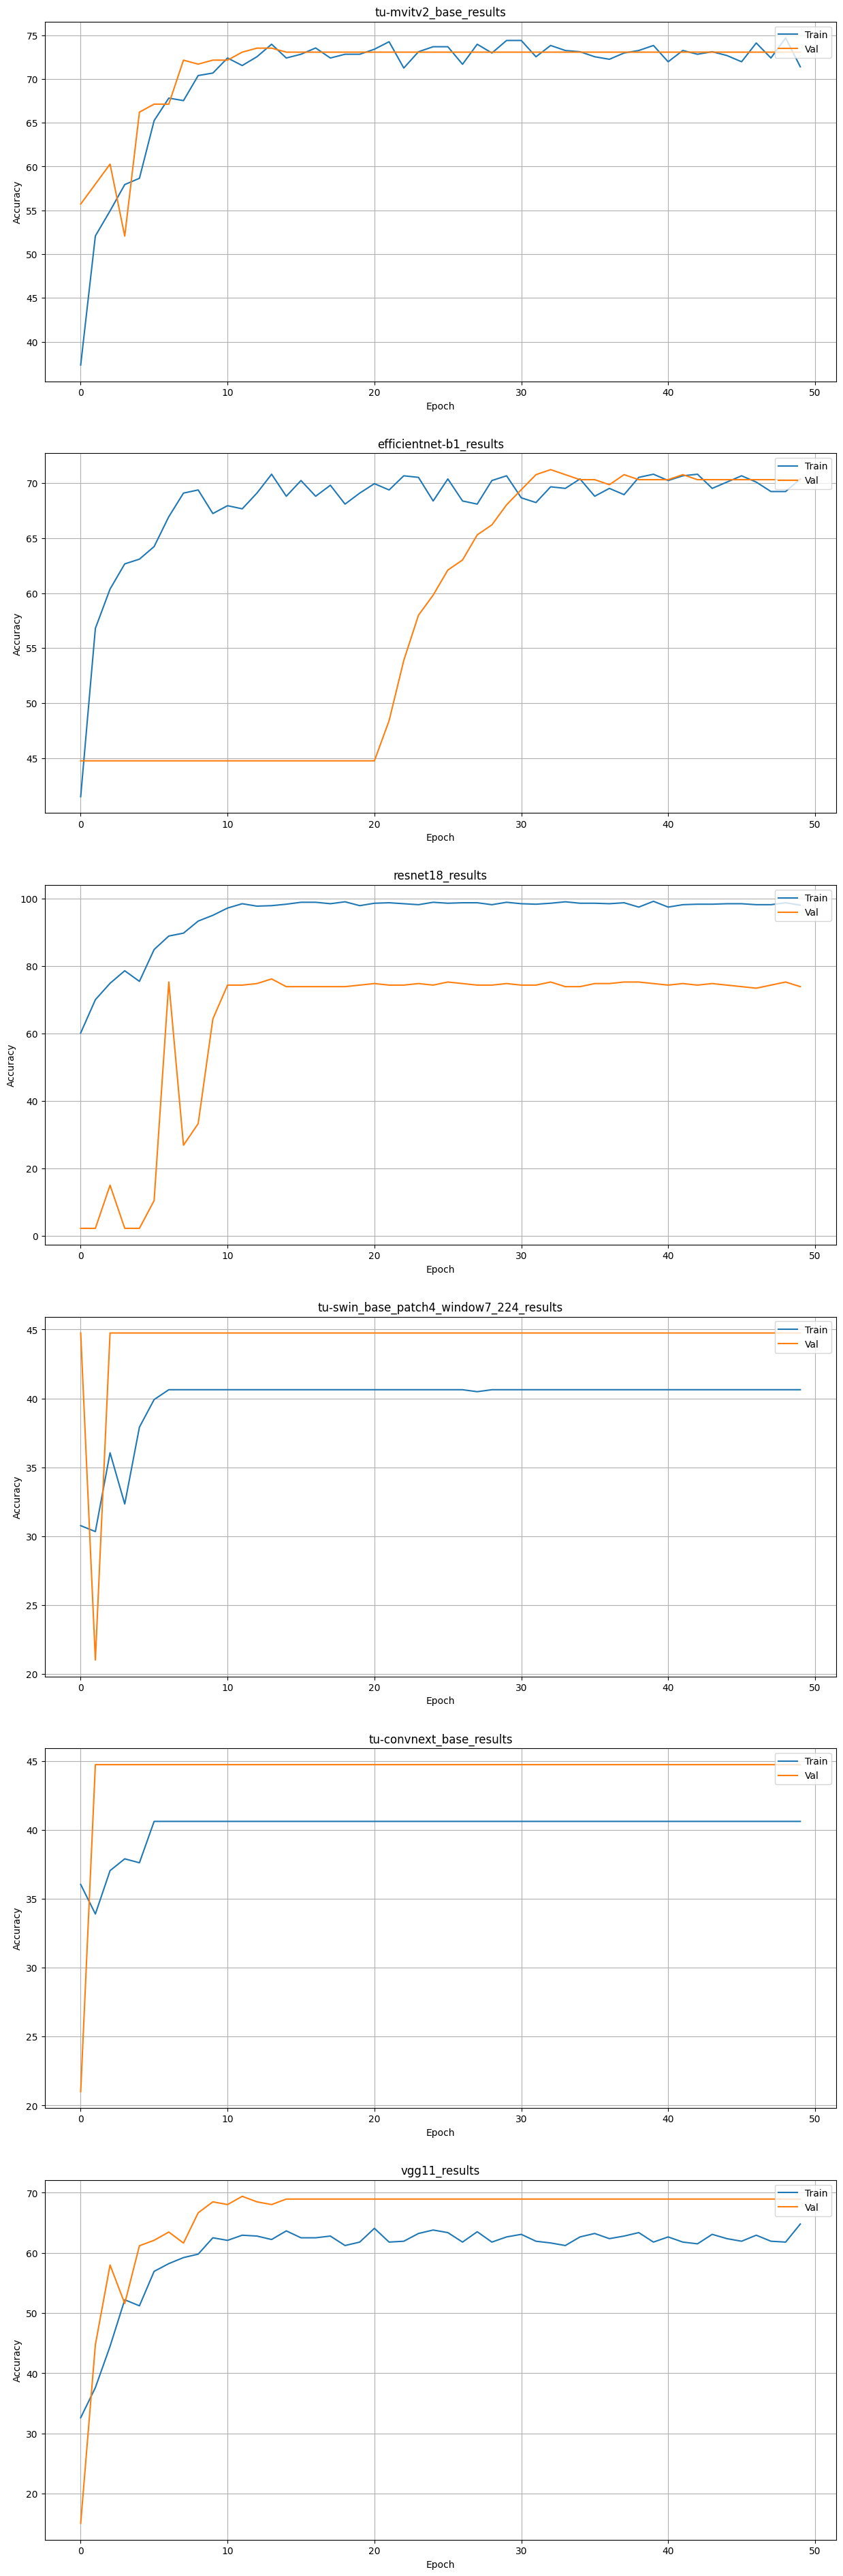

In [5]:
acc_fig = plot_accuracy(results)
acc_fig.savefig(os.path.join(path, "accuracy.png"), bbox_inches='tight')